In [ ]:
!pip install grcwa
import grcwa
import numpy as np

In [ ]:
grcwa.set_backend('autograd')
#Lattice vectors
L1=[0.96380,0]
L2=[0,0.96380]
#Truncation order(don't really have a clear idea about it)
nG=101
#frequency
#freq=666666.667
#Qabs=np.inf
#freqcmp=freq*(1+1j/2/Qabs)
#incident angle
theta=0
phi=0
reflectance=[]
transmittance=[]

In [ ]:
def object_setup(freq,theta,pol_amp):
    obj=grcwa.obj(nG,L1,L2,freq,theta,phi,verbose=1)
    #number of patterned layers
    Np=1
    #number of grid points within a unit cell
    Nx=400
    Ny=400

    #wavelength of incident light
    wavelength=1/freq

    #refractive indices of layers of Bragg mirror
    #n1=12.1 #Si layer
    #n2=2.1 #SiO2 layer

    #defining the thicknesses of the different layer
    thick0=0.1 #the first uniform layer (generally taken to be vacuum or air)should be on the top and bottom of the structure
    thick_graphene=0.00034#thickness of the graphene layer
    pthick=[0.110775]
    thick2=0.4 #defining the thickness of the perfectly reflecting metal layer
    #thick2=[wavelength/(4*n1) if i %2==1 else wavelength/(4*n2) for i in range(11)]#thickness of the Bragg mirror made by alternating layers of Si and SiO2
    thickN=1

    #defining the dielectric constant of the different layers
    ep0=1.
    ep_graphene=(3+(5.446*wavelength/3)*(1j))**2 #dielectric constant is refractive index squared times epsilon_not
    ep2=-1e5 #dielectric constant of purely reflecting mirror is taken to be a large negative value by elec people
    epN=1.

    #adding layers to the structure
    obj.Add_LayerUniform(thick0,ep0)#uniform slab
    obj.Add_LayerUniform(thick_graphene,ep_graphene)
    for i in range(Np):
        obj.Add_LayerGrid(pthick[i],Nx,Ny)#patterned layer
    obj.Add_LayerUniform(thick2,ep2)
    obj.Add_LayerUniform(thickN,epN)

    #after adding all layers, run this, will return the total nG
    obj.Init_Setup()
    #obj_with_pattern=pattern_setup(obj)

    #defining the hole radius for patterned layer
    radius=0.151897#for the purpose of comparison with the plot in the paper the ratio is kept 0.17


    #defining the dielectric constant of the patterned layers and the holes
    ep1=12.1
    epbkg=1.

    #number of grid points within a unit cell
    Nx=400
    Ny=400

    #coordinate
    x0=np.linspace(0,0.9,Nx)
    y0=np.linspace(0,0.9,Ny)
    x,y=np.meshgrid(x0,y0,indexing='ij')
    #print(x[50])
    #patterned layer1
    epgrid1=np.ones((Nx,Ny))*ep1
    ind=(x-(L1[0]/2))**2+(y-(L1[0]/2))**2<radius**2
    epgrid1[ind]=epbkg
    #print(epgrid1[50])

    #layer2
    #epgrid2=np.ones((Nx,Ny))*ep2
    #ind=np.logical_and(np.abs(x-.5)<a/2 , np.abs(y-.5)<a/2)
    #epgrid2[ind]=epbkg

    #combine epsilon of all layers after flattening them into 1D arrays as required
    #epgrid=np.concatenate((epgrid1.flatten(),epgrid2.flatten()))
    epgrid=epgrid1#.flatten() #Ayush's code doesn't use flatten()
    obj.GridLayer_geteps(epgrid)

    planewave={'p_amp':pol_amp[0],'s_amp':pol_amp[1],'p_phase':0,'s_phase':0}
    obj.MakeExcitationPlanewave(planewave['p_amp'],planewave['p_phase'],planewave['s_amp'],planewave['s_phase'],order=0)

    R,T=obj.RT_Solve(normalize=1)
    print((R,T))
    reflectance.append(R)
    transmittance.append(T)

In [ ]:
freq_range=np.linspace(0.63,0.68,100)
for freq in freq_range:
    #obj=grcwa.obj(nG,L1,L2,freq,theta,phi,verbose=1)
    object_setup(freq,theta,[0,1])
    #Assigning the amplitudes and phase of the s- and p-polarizations of the wave
    #planewave={'p_amp':0,'s_amp':1,'p_phase':0,'s_phase':0}
    #new_obj.MakeExcitationPlanewave(planewave['p_amp'],planewave['s_amp'],planewave['p_phase'],planewave['s_phase'])

    #solve for R and T
    #R,T=new_obj.RT_Solve(normalize=1)
    #reflectance.append(R)
    #transmittance.append(T)


Total nG =  97
(0.8894120588308222, 0.0)
Total nG =  97
(0.8880538104821545, 0.0)
Total nG =  97
(0.8866162374289372, 0.0)
Total nG =  97
(0.8850917369724979, 0.0)
Total nG =  97
(0.8834718023883442, 0.0)
Total nG =  97
(0.881746893511397, 0.0)
Total nG =  97
(0.879906285578145, 0.0)
Total nG =  97
(0.8779378921359444, 0.0)
Total nG =  97
(0.8758280569219351, 0.0)
Total nG =  97
(0.8735613084898042, 0.0)
Total nG =  97
(0.8711200699651275, 0.0)
Total nG =  97
(0.8684843145683703, 0.0)
Total nG =  97
(0.865631155369416, 0.0)
Total nG =  97
(0.8625343550119796, 0.0)
Total nG =  97
(0.8591637377272561, 0.0)
Total nG =  97
(0.8554844816596465, 0.0)
Total nG =  97
(0.8514562641245795, 0.0)
Total nG =  97
(0.8470322256298101, 0.0)
Total nG =  97
(0.8421577099758878, 0.0)
Total nG =  97
(0.8367687271155447, 0.0)
Total nG =  97
(0.8307900722654209, 0.0)
Total nG =  97
(0.8241330186147051, 0.0)
Total nG =  97
(0.8166924815934826, 0.0)
Total nG =  97
(0.8083435301740891, 0.0)
Total nG =  97
(0.7

In [ ]:
A_complement=np.add(np.array(reflectance),np.array(transmittance))
print(len(A_complement))
absorbance=1-A_complement
print(absorbance)
print(len(freq_range))

100
[0.11058794 0.11194619 0.11338376 0.11490826 0.1165282  0.11825311
 0.12009371 0.12206211 0.12417194 0.12643869 0.12887993 0.13151569
 0.13436884 0.13746564 0.14083626 0.14451552 0.14854374 0.15296777
 0.15784229 0.16323127 0.16920993 0.17586698 0.18330752 0.19165647
 0.2010629  0.21170529 0.22379794 0.23759876 0.25341854 0.27163167
 0.29268797 0.31712455 0.34557536 0.37877335 0.41753624 0.46271911
 0.51510695 0.57520641 0.64288775 0.71684289 0.7939059  0.86847314
 0.93253723 0.97696389 0.99413968 0.98092784 0.94004289 0.87881762
 0.80630056 0.73056764 0.65736754 0.59002375 0.52998027 0.47747075
 0.43206231 0.39301981 0.35952062 0.3307675  0.30603986 0.2847109
 0.26624721 0.25020053 0.23619669 0.2239243  0.2131244  0.20358137
 0.19511532 0.18757577 0.18083639 0.17479075 0.16934888 0.16443439
 0.15998223 0.15593674 0.15225015 0.14888129 0.14579459 0.14295916
 0.14034812 0.13793801 0.13570825 0.13364078 0.13171968 0.12993088
 0.1282619  0.12670168 0.12524036 0.12386912 0.12258011 0.1

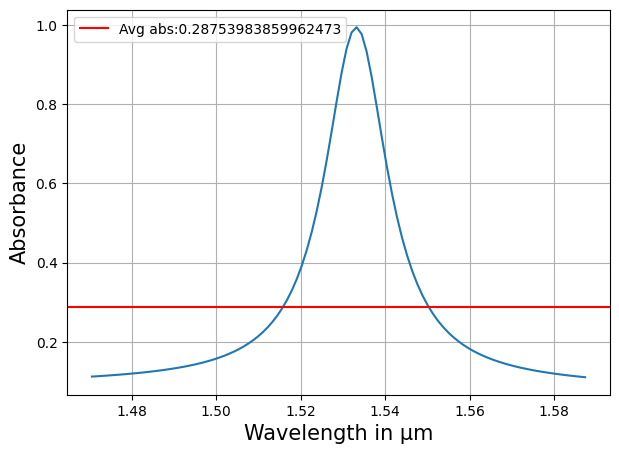

0.994139683665431

In [ ]:
import matplotlib.pyplot as plt
fig,ax=plt.subplots(1,1,figsize=(7,5))
ax.plot(np.reciprocal(freq_range),absorbance)
ax.axhline(y=np.average(absorbance),color='r',linestyle='-',label='Avg abs:{}'.format(np.average(absorbance)))
ax.set_xlabel(u'Wavelength in \u03bcm',fontsize='15')
ax.set_ylabel('Absorbance',fontsize='15')
ax.grid(True)
ax.legend()
plt.show()
np.max(absorbance)

In [ ]:
absorbance=list(absorbance)
max_index=absorbance.index(np.max(absorbance))
freq_max=freq_range[max_index]
freq_max

0.6522222222222223

In [ ]:
reflectance=[]
transmittance=[]
theta_range=np.linspace(-np.pi/10,np.pi/10,100)
for theta in theta_range:
  object_setup(freq_max,theta,(0,1))

Total nG =  97
(0.4173534016934689, 0.0)
Total nG =  97
(0.3995003669725602, 0.0)
Total nG =  97
(0.3814528390334153, 0.0)
Total nG =  97
(0.36326617353998514, 0.0)
Total nG =  97
(0.34499992961948794, 0.0)
Total nG =  97
(0.32671733882627985, 0.0)
Total nG =  97
(0.30848464876060205, 0.0)
Total nG =  97
(0.2903703487231328, 0.0)
Total nG =  97
(0.2724442903580135, 0.0)
Total nG =  97
(0.25477672177504485, 0.0)
Total nG =  97
(0.2374372588070599, 0.0)
Total nG =  97
(0.22049382141261445, 0.0)
Total nG =  97
(0.2040115664599738, 0.0)
Total nG =  97
(0.18805184991925997, 0.0)
Total nG =  97
(0.17267125158059107, 0.0)
Total nG =  97
(0.15792069380501755, 0.0)
Total nG =  97
(0.14384468246387055, 0.0)
Total nG =  97
(0.13048069337716042, 0.0)
Total nG =  97
(0.11785872150427533, 0.0)
Total nG =  97
(0.10600100329127492, 0.0)
Total nG =  97
(0.0949219153576828, 0.0)
Total nG =  97
(0.08462804566881463, 0.0)
Total nG =  97
(0.07511842680748697, 0.0)
Total nG =  97
(0.06638491542404924, 0.0)


In [ ]:

A_complement=np.add(np.array(reflectance),np.array(transmittance))
print(len(A_complement))
absorbance=1-A_complement
print(absorbance)
print(len(freq_range))

100
[0.5826466  0.60049963 0.61854716 0.63673383 0.65500007 0.67328266
 0.69151535 0.70962965 0.72755571 0.74522328 0.76256274 0.77950618
 0.79598843 0.81194815 0.82732875 0.84207931 0.85615532 0.86951931
 0.88214128 0.893999   0.90507808 0.91537195 0.92488157 0.93361508
 0.9415873  0.9488191  0.95533674 0.96117111 0.96635697 0.97093219
 0.97493697 0.97841314 0.98140342 0.98395086 0.98609821 0.98788742
 0.98935921 0.99055268 0.99150497 0.99225101 0.99282329 0.99325167
 0.99356328 0.99378239 0.99393035 0.99402549 0.99408317 0.99411566
 0.99413219 0.99413892 0.99413891 0.99413219 0.99411565 0.99408316
 0.99402549 0.99393034 0.99378239 0.99356328 0.99325167 0.99282328
 0.99225101 0.99150497 0.99055268 0.98935921 0.98788741 0.9860982
 0.98395086 0.98140342 0.97841314 0.97493697 0.97093219 0.96635697
 0.96117111 0.95533674 0.9488191  0.9415873  0.93361508 0.92488157
 0.91537195 0.90507808 0.893999   0.88214128 0.86951931 0.85615532
 0.84207931 0.82732875 0.81194815 0.79598843 0.77950618 0.7

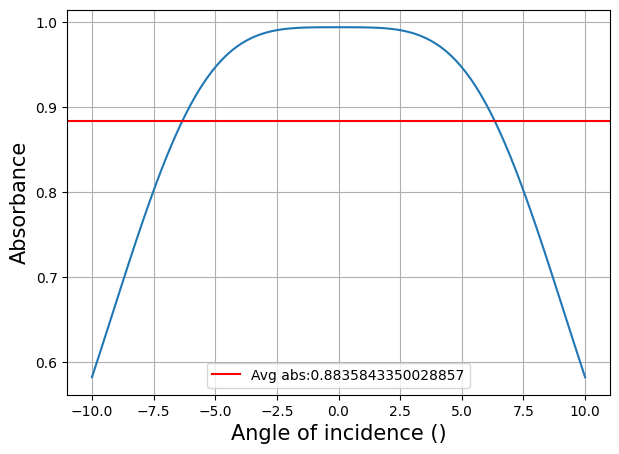

0.9941389154417417

In [ ]:
import matplotlib.pyplot as plt
fig,ax=plt.subplots(1,1,figsize=(7,5))
ax.plot(theta_range*(100/np.pi),absorbance)
ax.axhline(y=np.average(absorbance),color='r',linestyle='-',label='Avg abs:{}'.format(np.average(absorbance)))
ax.set_xlabel('Angle of incidence ()',fontsize='15')
ax.set_ylabel('Absorbance',fontsize='15')
ax.grid(True)
ax.legend()
plt.show()
np.max(absorbance)

In [ ]:
reflectance=[]
transmittance=[]
theta_range=np.linspace(-np.pi/10,np.pi/10,100)
for theta in theta_range:
  object_setup(freq_max,theta,[1,0])

Total nG =  97
(0.82485189844597, 0.0)
Total nG =  97
(0.8261661387733329, 0.0)
Total nG =  97
(0.8287396795046611, 0.0)
Total nG =  97
(0.8326298846125019, 0.0)
Total nG =  97
(0.837784203786944, 0.0)
Total nG =  97
(0.8440241467232624, 0.0)
Total nG =  97
(0.8510540198480226, 0.0)
Total nG =  97
(0.8584963293638626, 0.0)
Total nG =  97
(0.8659454178081144, 0.0)
Total nG =  97
(0.8730236601452201, 0.0)
Total nG =  97
(0.879424719390754, 0.0)
Total nG =  97
(0.8849352443127549, 0.0)
Total nG =  97
(0.8894352367019045, 0.0)
Total nG =  97
(0.8928834398821212, 0.0)
Total nG =  97
(0.8952958236644936, 0.0)
Total nG =  97
(0.8967236945258118, 0.0)
Total nG =  97
(0.8972352058100352, 0.0)
Total nG =  97
(0.8969015960275397, 0.0)
Total nG =  97
(0.8957879300697729, 0.0)
Total nG =  97
(0.8939474085267163, 0.0)
Total nG =  97
(0.8914181568227633, 0.0)
Total nG =  97
(0.888221528827552, 0.0)
Total nG =  97
(0.884361171502166, 0.0)
Total nG =  97
(0.8798222999603234, 0.0)
Total nG =  97
(0.8745

In [ ]:
A_complement=np.add(np.array(reflectance),np.array(transmittance))
print(len(A_complement))
absorbance=1-A_complement
print(absorbance)
print(len(freq_range))

100
[0.1751481  0.17383386 0.17126032 0.16737012 0.1622158  0.15597585
 0.14894598 0.14150367 0.13405458 0.12697634 0.12057528 0.11506476
 0.11056476 0.10711656 0.10470418 0.10327631 0.10276479 0.1030984
 0.10421207 0.10605259 0.10858184 0.11177847 0.11563883 0.1201777
 0.12542921 0.13144823 0.13831245 0.14612553 0.15502135 0.16516992
 0.17678514 0.19013517 0.20555569 0.22346706 0.24439571 0.26900009
 0.29809975 0.3327032  0.37402235 0.4234457  0.48241162 0.55207075
 0.63256235 0.72173288 0.81345457 0.89675939 0.95843179 0.99053236
 0.99771145 0.99486163 0.99486163 0.99771146 0.99053236 0.95843179
 0.89675939 0.81345457 0.72173288 0.63256235 0.55207076 0.48241162
 0.42344571 0.37402236 0.3327032  0.29809975 0.26900009 0.24439572
 0.22346706 0.2055557  0.19013517 0.17678515 0.16516992 0.15502135
 0.14612553 0.13831245 0.13144823 0.12542921 0.1201777  0.11563883
 0.11177847 0.10858184 0.10605259 0.10421207 0.1030984  0.10276479
 0.10327631 0.10470418 0.10711656 0.11056476 0.11506476 0.12

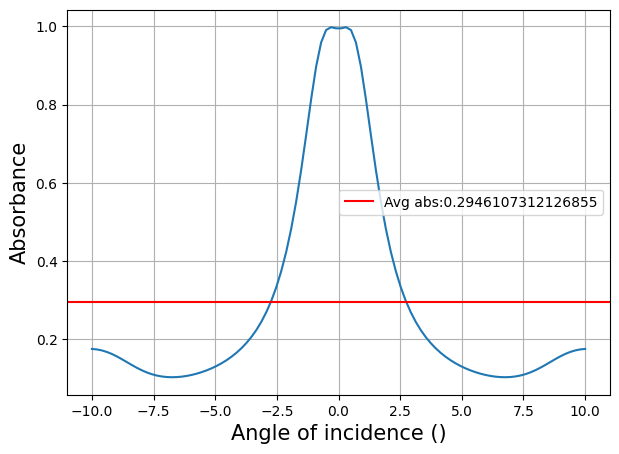

0.9977114559387784

In [ ]:

fig,ax=plt.subplots(1,1,figsize=(7,5))
ax.plot(theta_range*(100/np.pi),absorbance)
ax.axhline(y=np.average(absorbance),color='r',linestyle='-',label='Avg abs:{}'.format(np.average(absorbance)))
ax.set_xlabel('Angle of incidence ()',fontsize='15')
ax.set_ylabel('Absorbance',fontsize='15')
ax.grid(True)
ax.legend()
plt.show()
np.max(absorbance)

In [ ]:
reflectance=[]
transmittance=[]
theta_range=np.linspace(-np.pi/10,np.pi/10,100)
for theta in theta_range:
  object_setup(freq_max,theta,[1/np.sqrt(2),1/np.sqrt(2)])

Total nG =  97
(0.6211019244509345, 0.0)
Total nG =  97
(0.6128302182448755, 0.0)
Total nG =  97
(0.6050902227402437, 0.0)
Total nG =  97
(0.5979382852394367, 0.0)
Total nG =  97
(0.5913779590053586, 0.0)
Total nG =  97
(0.5853517309686214, 0.0)
Total nG =  97
(0.5797450541412605, 0.0)
Total nG =  97
(0.5744036401660227, 0.0)
Total nG =  97
(0.5691598074314205, 0.0)
Total nG =  97
(0.5638600658583535, 0.0)
Total nG =  97
(0.5583862083519062, 0.0)
Total nG =  97
(0.5526656182238896, 0.0)
Total nG =  97
(0.5466709211221301, 0.0)
Total nG =  97
(0.5404121698883759, 0.0)
Total nG =  97
(0.5339256119521202, 0.0)
Total nG =  97
(0.52726231592322, 0.0)
Total nG =  97
(0.520478556983442, 0.0)
Total nG =  97
(0.5136286362285922, 0.0)
Total nG =  97
(0.5067600302552357, 0.0)
Total nG =  97
(0.49991040937786085, 0.0)
Total nG =  97
(0.4931059825475244, 0.0)
Total nG =  97
(0.48636068489746365, 0.0)
Total nG =  97
(0.4796758263860781, 0.0)
Total nG =  97
(0.47303991852394556, 0.0)
Total nG =  97
(

In [ ]:
A_complement=np.add(np.array(reflectance),np.array(transmittance))
print(len(A_complement))
absorbance=1-A_complement
print(absorbance)
print(len(freq_range))

100
[0.37889808 0.38716978 0.39490978 0.40206171 0.40862204 0.41464827
 0.42025495 0.42559636 0.43084019 0.43613993 0.44161379 0.44733438
 0.45332908 0.45958783 0.46607439 0.47273768 0.47952144 0.48637136
 0.49323997 0.50008959 0.50689402 0.51363932 0.52032417 0.52696008
 0.53357153 0.5401964  0.54688668 0.55370966 0.56074966 0.56811062
 0.57591959 0.58433155 0.5935357  0.60376372 0.61530018 0.62849526
 0.64377905 0.66167529 0.68280846 0.70789016 0.73765572 0.77269527
 0.81309188 0.85778084 0.903709   0.94540186 0.97625995 0.99232052
 0.99591399 0.99449011 0.99449013 0.99591457 0.99232287 0.97626527
 0.94541066 0.90372102 0.85779532 0.81310797 0.77271224 0.737673
 0.70790737 0.68282535 0.66169171 0.64379491 0.62851051 0.61531481
 0.60377771 0.59354906 0.58434429 0.57593173 0.56812216 0.56076063
 0.55372007 0.54689653 0.5402057  0.53358029 0.52696831 0.52033187
 0.51364648 0.50690065 0.50009569 0.49324553 0.48637639 0.47952594
 0.47274165 0.46607783 0.45959077 0.45333153 0.44733638 0.44

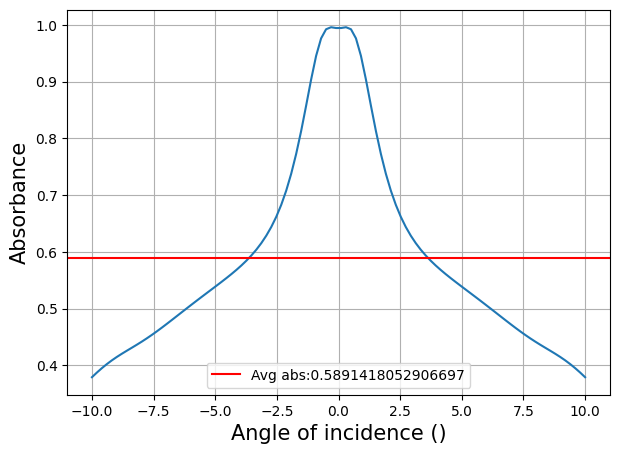

0.9959145655169278

In [ ]:
fig,ax=plt.subplots(1,1,figsize=(7,5))
ax.plot(theta_range*(100/np.pi),absorbance)
ax.axhline(y=np.average(absorbance),color='r',linestyle='-',label='Avg abs:{}'.format(np.average(absorbance)))
ax.set_xlabel('Angle of incidence ()',fontsize='15')
ax.set_ylabel('Absorbance',fontsize='15')
ax.grid(True)
ax.legend()
plt.show()
np.max(absorbance)